In [1]:
import re
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM, Embedding, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

Matplotlib is building the font cache; this may take a moment.


In [7]:
X_train= pd.read_csv('Train.csv', index_col="ID")

In [8]:
X_train.head()

,text,label
ID,,
SUAVK39Z,I feel that it was better I dieAm happy,Depression
9JDAGUV3,Why do I get hallucinations?,Drugs
419WR1LQ,I am stresseed due to lack of financial suppor...,Depression
6UY7DX6Q,Why is life important?,Suicide
FYC0FTFB,How could I be helped to go through the depres...,Depression


In [10]:
data = X_train[['text', 'label']]

<AxesSubplot:>

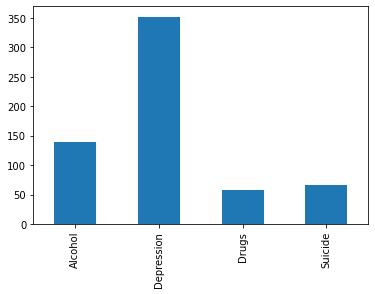

In [11]:
data['label'].value_counts().sort_index().plot.bar()

<AxesSubplot:ylabel='Frequency'>

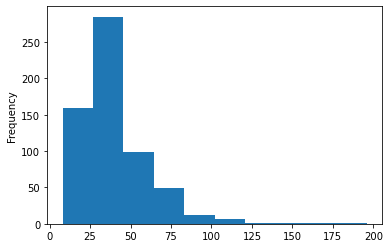

In [12]:
data['text'].str.len().plot.hist()

In [13]:
data['text'].apply(lambda x: x.lower()) #transform text to lowercase
data['text'] = data['text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
data['text'].head()

ID
SUAVK39Z              I feel that it was better I dieAm happy
9JDAGUV3                          Why do I get hallucinations
419WR1LQ    I am stresseed due to lack of financial suppor...
6UY7DX6Q                                Why is life important
FYC0FTFB    How could I be helped to go through the depres...
Name: text, dtype: object

In [14]:
tokenizer = Tokenizer(num_words=5000, split=" ")
tokenizer.fit_on_texts(data['text'].values)

X = tokenizer.texts_to_sequences(data['text'].values)
X = pad_sequences(X) # padding our text vector so they all have the same length
X[:5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   4,  42,  22,  26,  45,   1, 353, 196],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  20,  13,   1,  29, 246],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,  14,
        354, 355,   2, 131,   6, 104, 197,  16, 118],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  20,   9,  17, 198],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         60,   1,  34, 132,   2, 199, 153,   5,  19]])

In [17]:
X.shape

(616, 35)

In [30]:
model=Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.5))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))

In [31]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 35, 256)           1280000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 35, 256)           0         
_________________________________________________________________
lstm_11 (LSTM)               (None, 35, 256)           525312    
_________________________________________________________________
lstm_12 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 1028      
Total params: 2,331,652
Trainable params: 2,331,652
Non-trainable params: 0
_________________________________________________________________


In [32]:
y = pd.get_dummies(data['label']).values
[print(data['label'][i], y[i]) for i in range(0,10)]

Depression [0 1 0 0]
Drugs [0 0 1 0]
Depression [0 1 0 0]
Suicide [0 0 0 1]
Depression [0 1 0 0]
Depression [0 1 0 0]
Depression [0 1 0 0]
Depression [0 1 0 0]
Alcohol [1 0 0 0]
Drugs [0 0 1 0]


[None, None, None, None, None, None, None, None, None, None]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [34]:
model.fit(X_train,y_train, epochs=8, batch_size=16, validation_split=0.2, verbose=2)

Epoch 1/8
28/28 - 21s - loss: 1.2360 - accuracy: 0.5440 - val_loss: 1.1588 - val_accuracy: 0.5856
Epoch 2/8
28/28 - 13s - loss: 1.0848 - accuracy: 0.5711 - val_loss: 0.9658 - val_accuracy: 0.6847
Epoch 3/8
28/28 - 13s - loss: 0.7862 - accuracy: 0.7133 - val_loss: 0.7545 - val_accuracy: 0.6847
Epoch 4/8
28/28 - 14s - loss: 0.5570 - accuracy: 0.7675 - val_loss: 0.6285 - val_accuracy: 0.7658
Epoch 5/8
28/28 - 14s - loss: 0.4213 - accuracy: 0.8510 - val_loss: 0.5991 - val_accuracy: 0.7387
Epoch 6/8
28/28 - 13s - loss: 0.3210 - accuracy: 0.8894 - val_loss: 0.4706 - val_accuracy: 0.8288
Epoch 7/8
28/28 - 14s - loss: 0.2021 - accuracy: 0.9210 - val_loss: 0.5771 - val_accuracy: 0.7928
Epoch 8/8
28/28 - 13s - loss: 0.1521 - accuracy: 0.9481 - val_loss: 0.4626 - val_accuracy: 0.8468


In [35]:
model.save('sentiment_analysis.h5')

In [36]:
predictions = model.predict(X_test)

[print(data['text'][i], predictions[i], y_test[i]) for i in range(0, 5)]

I feel that it was better I dieAm happy [7.1992340e-06 9.9995387e-01 8.6263854e-06 3.0267620e-05] [0 1 0 0]
Why do I get hallucinations [0.00460846 0.9694705  0.00332095 0.02260012] [0 1 0 0]
I am stresseed due to lack of financial support in school [6.9679777e-06 9.9993134e-01 1.1701729e-05 4.9991530e-05] [0 1 0 0]
Why is life important [1.8232768e-05 9.9984586e-01 2.4858477e-05 1.1094421e-04] [0 1 0 0]
How could I be helped to go through the depression [0.01522382 0.89430267 0.01445865 0.07601487] [0 1 0 0]


[None, None, None, None, None]

In [37]:
depression, alcohol, suicide, drugs = 0, 0, 0, 0
real_depression, real_alcohol, real_suicide, real_drugs = 0, 0, 0, 0
for i, prediction in enumerate(predictions):
  if np.argmax(prediction)==3:
    suicide+=1
  elif np.argmax(prediction)==2:
    drugs+=1
  elif np.argmax(prediction)==1:
    depression+=1
  else:
    alcohol+=1

  if np.argmax(y_test[i])==3:
    real_suicide+=1
  elif np.argmax(y_test[i])==2:
    real_drugs+=1
  elif np.argmax(y_test[i])==1:
    real_depression+=1
  else:
    real_alcohol+=1

print("real_depression", real_depression)
print("predicted_depression", depression)
print("real_alcohol", real_alcohol)
print("predicted_alcohol", alcohol)
print("real_suicide", real_suicide)
print("predicted_suicide", suicide)
print("real_drugs", real_drugs)
print("predicted_drugs", drugs)

real_depression 42
predicted_depression 43
real_alcohol 15
predicted_alcohol 10
real_suicide 2
predicted_suicide 5
real_drugs 3
predicted_drugs 4


In [38]:
test2=pd.read_csv('Test.csv')
data2=test2[['ID','text']]

In [41]:
data2.head()

,ID,text
0,02V56KMO,How to overcome bad feelings and emotions
1,03BMGTOK,I feel like giving up in life
2,03LZVFM6,I was so depressed feel like got no strength t...
3,0EPULUM5,I feel so low especially since I had no one to...
4,0GM4C5GD,can i be successful when I am a drug addict?


In [42]:
tokenizer.fit_on_texts(data['text'].values)

Z = tokenizer.texts_to_sequences(data2['text'].values)
Z = pad_sequences(Z) # padding our text vector so they all have the same length
Z[:5]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   3,   2,  33,  63,  83,   7, 575],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   1,   4,  23, 112,  49,  16,  17],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   1,  26,  39,  28,   4,  23, 275,  64,   2, 684],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          4,  39,  40, 545, 724,   1,  72,  64,  32,   2, 195,   2],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   8,   1,  34,  54,   1,  14,  21, 135, 223]])

In [43]:
preds2=model.predict(Z)

In [44]:
preds2

array([[6.1505218e-04, 9.9620557e-01, 4.9650593e-04, 2.6828239e-03],
       [1.0523839e-06, 9.9998319e-01, 2.3948344e-06, 1.3359365e-05],
       [2.1867942e-07, 9.9999714e-01, 4.7940040e-07, 2.1719763e-06],
       ...,
       [8.0974802e-02, 6.9643998e-01, 2.8534042e-02, 1.9405118e-01],
       [6.1739385e-03, 1.0845151e-03, 9.1070157e-01, 8.2040012e-02],
       [1.7969887e-01, 5.8902836e-01, 4.7409106e-02, 1.8386364e-01]],
      dtype=float32)

In [45]:
preds2.round()

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]], dtype=float32)

In [46]:
preds2.shape

(309, 4)

In [47]:
preds3=pd.DataFrame(preds2)

In [48]:
preds3.to_csv('Predictions_Test.csv')